# Merging and Joining with Pandas

One of the tasks that needs to be mastered in manipulating data is to merge and join dataframes. This process may be familiar to those who have used `vlookup` in Excel to merge two spreadsheets. In `pandas` this can be performed using the `df.append()`, `pd.concat()` and `pd.merge()` functions. In this lesson we use two simple data sets to explain the basics of merging and joining with pandas.

## Contents

* Merging unordered dataframes
* Merging timeseries
* Exercises

## Merging unordered dataframes

The first data sets relate to the marks for a hypothetical Musicology unit at Ashmon University. We have ExamMark.csv with a set of ID numbers and exam marks out of 100. Similarly, there is CAMark.csv with ID numbers and continuous assessment mark out of 80. Then there is StudentNames.csv which contains the ID numbers and the full names of the students who enrolled in this unit at the beginning of semester. The student names are kept separate from the marks until the marks are finalised, since all marking has been done anonymously. Finally, there is the coursecodes.csv which indicates which class session each student is in. There is a different range of student records in each file, since some dropped out before the end of semester or didn't complete the continuous assesment or exam. The exam and continuous assessment are each worth 50% of the final mark, and we want to create a new file which includes the names, marks, and course codes for all students who completed the unit.

In [4]:
import pandas as pd

exams = pd.read_csv('04-Merging_ExamMark.csv')
ca = pd.read_csv('04-Merging_CAMark.csv')
studentnames = pd.read_csv('04-Merging_StudentNames.csv')
coursecodes = pd.read_csv('04-Merging_coursecodes.csv')
print(exams)
print(ca)
print(studentnames)
print(coursecodes)

   Student ID  Exam Mark
0        7634         52
1        6789         73
2        9016         87
3        9532         81
4        8318         43
   Student ID  CA Mark
0        6789       62
1        7410        8
2        7634       34
3        9016       69
4        8318       65
   ID Number  Firstname    Lastname
0       7634      James       Brown
1       6789       Ella  Fitzgerald
2       7410     Herbie     Hancock
3       9016      Dolly      Parton
4       9532      Keith    Richards
5       2888  Thelonius        Monk
   ID Number  Course Code
0       9532            1
1       6789            1
2       2888            1
3       8318            2
4       7410            2
5       9016            3
6       7634            3


The first problem that we can see is that there is a student with an exam mark and CA mark (StudentID 8318), but not listed in the student names. This is probably due to a late enrollment in the unit. Luckily we can look up these details (say, on the Moodle site for this hypothetical class) and append this to the dataframe. Another problem is that we need the course code for each student, so we also need to append this to the dataframe. Finally, we can also see that there is a student with an exam mark, but no corresponding CA mark (9532) and a student with a CA mark, but no exam mark (7410). We will first examine how this can be done using `df.append()` and `pd.concat()`.

`df.append()` is just used for appending rows to a dataframe. The original dataframe and the new dataframe do not necessarily need to have the same columns. If they don't, the missing values will be filled with NaN.
We set `ignore_index=True` here so that the new dataframe recreates the indices. Otherwise the indices from the original dataframes are used, and there is the possibly of rows with the same indices.

In [5]:
newrow = pd.DataFrame({'ID Number':[8318, 2718],
                       'Firstname':['Nina', 'Chick'],
                       'Lastname':['Simone', 'Corea']})
studentnames.append([newrow], ignore_index=True)

,ID Number,Firstname,Lastname
0,7634,James,Brown
1,6789,Ella,Fitzgerald
2,7410,Herbie,Hancock
3,9016,Dolly,Parton
4,9532,Keith,Richards
5,2888,Thelonius,Monk
6,8318,Nina,Simone
7,2718,Chick,Corea


The routine `pd.concat()` does the same type of joins of rows, but it also allows columns to be joined to form a new dataframe. The difference is now the dataframes that are to be merged must be specified as a list. Say we have another student to add:

In [6]:
anotherrow = pd.DataFrame({'ID Number':[3141],'Firstname':['Dusty'],'Lastname':['Springfield']})
pd.concat([studentnames, newrow, anotherrow], ignore_index=True)

,ID Number,Firstname,Lastname
0,7634,James,Brown
1,6789,Ella,Fitzgerald
2,7410,Herbie,Hancock
3,9016,Dolly,Parton
4,9532,Keith,Richards
5,2888,Thelonius,Monk
6,8318,Nina,Simone
7,2718,Chick,Corea
8,3141,Dusty,Springfield


When merging the dataframes, we may want to add a `key` which is associated with the original dataframes. For example, if one set of student records corresponds to early enrollments, and the other to late enrollments, we can incorporate this by specifying keys. In this case we can keep the indices of the original dataframes.

In [7]:
pd.concat([studentnames, newrow], keys=['Early', 'Late'])

ID Number  Firstname    Lastname
Early 0       7634      James       Brown
      1       6789       Ella  Fitzgerald
      2       7410     Herbie     Hancock
      3       9016      Dolly      Parton
      4       9532      Keith    Richards
      5       2888  Thelonius        Monk
Late  0       8318       Nina      Simone
      1       2718      Chick       Corea

Now we will update `studentnames` so that it just includes the required missing rows.

In [8]:
newrow = pd.DataFrame({'ID Number': [8318],
                       'Firstname': ['Nina'],
                       'Lastname': ['Simone']})
studentnames = pd.concat([studentnames,newrow], ignore_index=True)
studentnames

,ID Number,Firstname,Lastname
0,7634,James,Brown
1,6789,Ella,Fitzgerald
2,7410,Herbie,Hancock
3,9016,Dolly,Parton
4,9532,Keith,Richards
5,2888,Thelonius,Monk
6,8318,Nina,Simone


We now need to add course codes to the dataframe.

In [9]:
coursecodes

,ID Number,Course Code
0,9532,1
1,6789,1
2,2888,1
3,8318,2
4,7410,2
5,9016,3
6,7634,3


`pd.merge()` can be used to add the course codes to our student list. Note that `studentnames` and `coursecodes` have the common index 'ID Number'. Therefore if we merge them, by default this common index will be used to create the new dataframe.

In [10]:
studentnames = pd.merge(studentnames, coursecodes)
studentnames

,ID Number,Firstname,Lastname,Course Code
0,7634,James,Brown,3
1,6789,Ella,Fitzgerald,1
2,7410,Herbie,Hancock,2
3,9016,Dolly,Parton,3
4,9532,Keith,Richards,1
5,2888,Thelonius,Monk,1
6,8318,Nina,Simone,2


We now want to merge the exams marks and the CA marks, which have the common index 'Student ID'. There are four ways we can do this by specifying the keyword `how`. 'left' merges are based on the rows of the left dataframe and if there are no corresponding values for that in right dataframe, these entries are filled with NaN. 'right' does the same, but based on the rows of the right data frame. 'inner' merges are based on the intersection of the two dataframes, i.e., the rows common to both. 'outer' merges are based on the union of the two data frames, i.e., rows that are in either or both dataframes. The default is the inner merge. The corresponding results for each merge for the marks are shown below.

Since the only common key in both dataframes is 'Student ID', the merges will be based on this. It doesn't need to be specified here, but we include it for demonstration. Here the left dataframe is 'exams', and the right dataframe is 'ca'.

In [11]:
print(exams)
print(ca)

   Student ID  Exam Mark
0        7634         52
1        6789         73
2        9016         87
3        9532         81
4        8318         43
   Student ID  CA Mark
0        6789       62
1        7410        8
2        7634       34
3        9016       69
4        8318       65


In [12]:
# left merge
pd.merge(exams,ca,on='Student ID',how='left')

,Student ID,Exam Mark,CA Mark
0,7634,52,34.0
1,6789,73,62.0
2,9016,87,69.0
3,9532,81,NaN
4,8318,43,65.0


In [13]:
# right merge
pd.merge(exams,ca,on='Student ID',how='right')

,Student ID,Exam Mark,CA Mark
0,6789,73.0,62
1,7410,NaN,8
2,7634,52.0,34
3,9016,87.0,69
4,8318,43.0,65


In [14]:
# inner merge
pd.merge(exams,ca,on='Student ID',how='inner')

,Student ID,Exam Mark,CA Mark
0,7634,52,34
1,6789,73,62
2,9016,87,69
3,8318,43,65


In [15]:
# outer merge
pd.merge(exams,ca,on='Student ID',how='outer')

,Student ID,Exam Mark,CA Mark
0,7634,52.0,34.0
1,6789,73.0,62.0
2,9016,87.0,69.0
3,9532,81.0,NaN
4,8318,43.0,65.0
5,7410,NaN,8.0


pd.concat also allows dataframes to have columns added by specifying axis=1. In this case the new dataframe is created so that rows with the same indices in the two original dataframes are used to create the new row. For example, consider concatenation of the exams and ca dataframes based on the indices.

In [16]:
print(exams)
print(ca)
pd.concat([exams,ca], axis=1)

   Student ID  Exam Mark
0        7634         52
1        6789         73
2        9016         87
3        9532         81
4        8318         43
   Student ID  CA Mark
0        6789       62
1        7410        8
2        7634       34
3        9016       69
4        8318       65


,Student ID,Exam Mark,Student ID,CA Mark
0,7634,52,6789,62
1,6789,73,7410,8
2,9016,87,7634,34
3,9532,81,9016,69
4,8318,43,8318,65


We now have two columns named Student ID. To correctly concatenate the two data frames we need to set the Student ID (which is a unique value in each row) as in the index in each dataframe, and then contenate based on these keys. This performs an 'outer join', which is equivalent to specifying join='outer', and creates an entry for every index that occurs in either dataframe. The values that are missing are then filled with NaN.

In [17]:
newexams = exams.set_index('Student ID')
newca = ca.set_index('Student ID')
pd.concat([newexams, newca], axis=1)

,Exam Mark,CA Mark
Student ID,,
6789,73.0,62.0
7410,NaN,8.0
7634,52.0,34.0
8318,43.0,65.0
9016,87.0,69.0
9532,81.0,NaN


The alternative is to perform an 'inner join' by specifying join='inner' and then rows are only created if the indices occur in both dataframes

In [18]:
pd.concat([newexams,newca], axis=1, join='inner')

,Exam Mark,CA Mark
Student ID,,
7634,52,34
6789,73,62
9016,87,69
8318,43,65


The particular merge we want here is the 'outer' merge, which includes all students enrolled in the unit. We now want to merge that with `studentnames`. However, there is no common index in the two dataframes, although we can see that 'Student ID' and 'ID Number' are the same. Hence we want to do a merge based on these two indices. 'Student ID' is the index for the left dataframe, so is specified by `left_on`, while 'ID Number' is the index for the right dataframe, so is specified by `right_on`. We don't need both in the merged dataframe, so we drop 'ID Number'.

In [19]:
studentmarks = pd.merge(exams,ca,on='Student ID',how='outer')
print(studentnames)
print(studentmarks)

   ID Number  Firstname    Lastname  Course Code
0       7634      James       Brown            3
1       6789       Ella  Fitzgerald            1
2       7410     Herbie     Hancock            2
3       9016      Dolly      Parton            3
4       9532      Keith    Richards            1
5       2888  Thelonius        Monk            1
6       8318       Nina      Simone            2
   Student ID  Exam Mark  CA Mark
0        7634       52.0     34.0
1        6789       73.0     62.0
2        9016       87.0     69.0
3        9532       81.0      NaN
4        8318       43.0     65.0
5        7410        NaN      8.0


In [20]:
finalmarks = pd.merge(studentmarks,
                      studentnames,
                      left_on='Student ID',
                      right_on='ID Number',
                      how='outer').drop('Student ID',axis=1)
finalmarks

,Exam Mark,CA Mark,ID Number,Firstname,Lastname,Course Code
0,52.0,34.0,7634,James,Brown,3
1,73.0,62.0,6789,Ella,Fitzgerald,1
2,87.0,69.0,9016,Dolly,Parton,3
3,81.0,NaN,9532,Keith,Richards,1
4,43.0,65.0,8318,Nina,Simone,2
5,NaN,8.0,7410,Herbie,Hancock,2
6,NaN,NaN,2888,Thelonius,Monk,1


Now we can calculate the final mark. This is .5*'Exam Mark' + .625*'CA Mark', since 'Exam Mark' is out of 100, 'CA Mark' is out of 80 and both contribute 50% to the final mark. First we need to convert the NaN entries to zero. After the calculation we round final marks to the nearest integer. We also make 'Student ID' the index, reorder the columns to make the dataframe easier to read and sort the data frame into alphabetical order.

In [21]:
finalmarks = finalmarks.fillna(0)
finalmarks['Final Mark'] = .5*finalmarks['Exam Mark']+.625*finalmarks['CA Mark']
#same as finalmarks['Final Mark'] = 100*(.5*(finalmarks['Exam Mark']/100)+.5*(finalmarks['CA Mark']/80))
finalmarks['Final Mark'] = finalmarks['Final Mark'].round(decimals=0).astype('int64')
finalmarks = finalmarks[['ID Number',
                         'Firstname',
                         'Lastname',
                         'Course Code',
                         'CA Mark',
                         'Exam Mark',
                         'Final Mark']].set_index('ID Number')
finalmarks = finalmarks.sort_values(["Lastname", "Firstname"])
finalmarks

,Firstname,Lastname,Course Code,CA Mark,Exam Mark,Final Mark
ID Number,,,,,,
7634,James,Brown,3,34.0,52.0,47
6789,Ella,Fitzgerald,1,62.0,73.0,75
7410,Herbie,Hancock,2,8.0,0.0,5
2888,Thelonius,Monk,1,0.0,0.0,0
9016,Dolly,Parton,3,69.0,87.0,87
9532,Keith,Richards,1,0.0,81.0,40
8318,Nina,Simone,2,65.0,43.0,62


## Merging timeseries

The second example is a hypothetical electricity usage and generation for a house with solar panels. We have two files with the average power generation and power usage by time of day, which we need to merge into a single file to compare generation and usage. The only problem is that usage is recorded hourly, while generation is recorded every 40 minutes. 

For ordered data, such as this power data, pandas provides two methods `merge_ordered` and `merge_asof` which attempt to fill in the gaps in the merged files. We will just consider `merge_asof` here. The difference between the two routines is how they fill in the gaps.

Another option, which we won't discuss here, would be to resample one of the data sets using the `resample` method.

We first read in the two files and save them to data frames.

In [22]:
Generation = pd.read_csv('04-Merging_EnergyGeneration.csv')
Usage = pd.read_csv('04-Merging_EnergyUsage.csv')
print(Usage.head())
print(Generation.head())

      Time  Power Usage (kW)
0  0:00:00          0.001851
1  1:00:00          0.018957
2  2:00:00          0.137190
3  3:00:00          0.701568
4  4:00:00          2.535264
      Time  Power Generation (kW)
0  0:00:00                    0.0
1  0:40:00                    0.0
2  1:20:00                    0.0
3  2:00:00                    0.0
4  2:40:00                    0.0


To make it easier to merge and plot the data sets, we convert the time in standard datetime format to hours as decimal numbers using `str.split`, which splits a string at a given delimeter, and a simple lambda (inline) function (`int` converts the strings to integers).

In [23]:
Generation['Time'] = Generation['Time'].str.split(':').apply(lambda x: int(x[0])+ int(x[1])/60)
Usage['Time'] = Usage['Time'].str.split(':').apply(lambda x: int(x[0])+ int(x[1])/60)
print(Usage.head())
print(Generation.head())

   Time  Power Usage (kW)
0   0.0          0.001851
1   1.0          0.018957
2   2.0          0.137190
3   3.0          0.701568
4   4.0          2.535264
       Time  Power Generation (kW)
0  0.000000                    0.0
1  0.666667                    0.0
2  1.333333                    0.0
3  2.000000                    0.0
4  2.666667                    0.0


The two data sets can be plotted on the same figure.

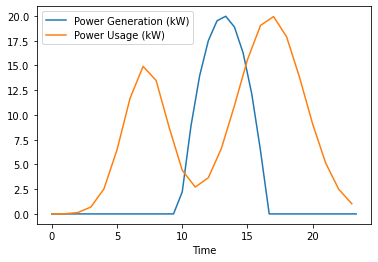

In [24]:
#using plotting methods on dataframes
ax1 = Generation.plot(x='Time',y='Power Generation (kW)')
Usage.plot(ax=ax1,x='Time',y='Power Usage (kW)');

If we try a merge the data is filled with NaN where the missing entries occur. If we try to plot either we only get the left data set.

      Power Usage (kW)  Power Generation (kW)
Time                                         
0.0           0.001851                    0.0
1.0           0.018957                    NaN
2.0           0.137190                    0.0
3.0           0.701568                    NaN
4.0           2.535264                    0.0


<AxesSubplot:xlabel='Time'>

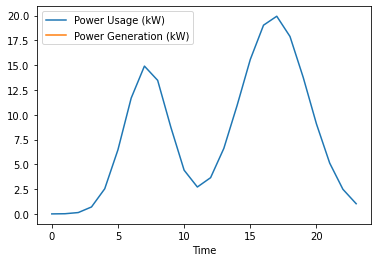

In [25]:
merged = pd.merge(Usage,Generation,on='Time',how='left').set_index('Time')
print(merged.head())
merged.plot()

          Power Generation (kW)  Power Usage (kW)
Time                                             
0.000000                    0.0          0.001851
0.666667                    0.0               NaN
1.333333                    0.0               NaN
2.000000                    0.0          0.137190
2.666667                    0.0               NaN


<AxesSubplot:xlabel='Time'>

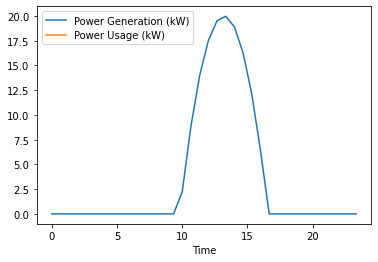

In [26]:
merged = pd.merge(Generation,Usage,on='Time',how='left').set_index('Time')
print(merged.head())
merged.plot()

If we try to right merge, we only get data at the common times, i.e., every two hours.

          Power Usage (kW)  Power Generation (kW)
Time                                             
0.000000          0.001851                    0.0
0.666667               NaN                    0.0
1.333333               NaN                    0.0
2.000000          0.137190                    0.0
2.666667               NaN                    0.0


<AxesSubplot:xlabel='Time'>

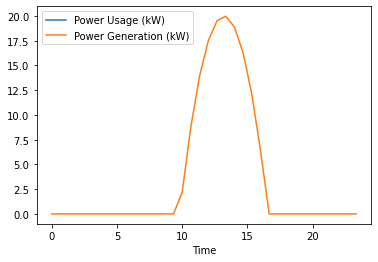

In [27]:
merged = pd.merge(Usage,Generation,on='Time',how='right').set_index('Time')
print(merged.head())
merged.plot()

      Power Generation (kW)  Power Usage (kW)
Time                                         
0.0                     0.0          0.001851
1.0                     NaN          0.018957
2.0                     0.0          0.137190
3.0                     NaN          0.701568
4.0                     0.0          2.535264


<AxesSubplot:xlabel='Time'>

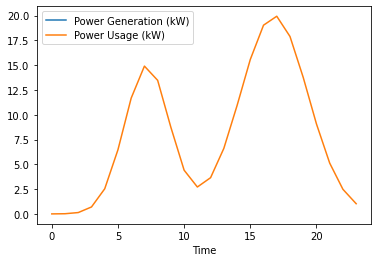

In [28]:
merged = pd.merge(Generation,Usage,on='Time',how='right').set_index('Time')
print(merged.head())
merged.plot()

The alternative is to use as of merge (`merge_asof`) which does a 'left' merge and fills in the missing data by searching forwards, backwards or to the nearest data point. We only show 'nearest', as the other two give similar results.

In [29]:
print(Generation.head(10))
print(Usage.head(10))

       Time  Power Generation (kW)
0  0.000000                    0.0
1  0.666667                    0.0
2  1.333333                    0.0
3  2.000000                    0.0
4  2.666667                    0.0
5  3.333333                    0.0
6  4.000000                    0.0
7  4.666667                    0.0
8  5.333333                    0.0
9  6.000000                    0.0
   Time  Power Usage (kW)
0   0.0          0.001851
1   1.0          0.018957
2   2.0          0.137190
3   3.0          0.701568
4   4.0          2.535264
5   5.0          6.474291
6   6.0         11.684480
7   7.0         14.908292
8   8.0         13.473404
9   9.0          8.729661


In [30]:
merged = pd.merge_asof(Generation,Usage,on='Time',direction = "nearest").set_index('Time')
merged.head(10)

,Power Generation (kW),Power Usage (kW)
Time,,
0.000000,0.0,0.001851
0.666667,0.0,0.018957
1.333333,0.0,0.018957
2.000000,0.0,0.137190
2.666667,0.0,0.701568
3.333333,0.0,0.701568
4.000000,0.0,2.535264
4.666667,0.0,6.474291
5.333333,0.0,6.474291


<AxesSubplot:xlabel='Time'>

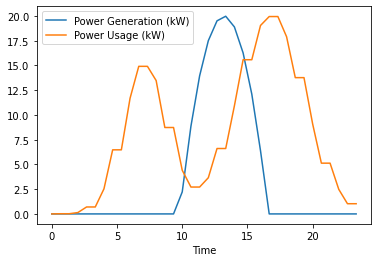

In [31]:
merged.plot()

In [32]:
# do a left merge on usage times
merged = pd.merge_asof(Usage,Generation,on='Time',direction='nearest').set_index('Time')
merged.head(10)

,Power Usage (kW),Power Generation (kW)
Time,,
0.0,0.001851,0.0
1.0,0.018957,0.0
2.0,0.137190,0.0
3.0,0.701568,0.0
4.0,2.535264,0.0
5.0,6.474291,0.0
6.0,11.684480,0.0
7.0,14.908292,0.0
8.0,13.473404,0.0


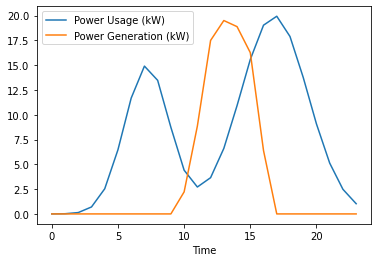

In [33]:
merged.plot();

## Exercises

### Exercise 1

Merge the three dataframes, AusPrecip, AusMaxTemp and AusMinTemp, which show the average January values for locations around Australia, into a single dataframe which shows the precipation, and average maximum and minimum temperatures for only the capital cities. The columns should have appropriate names.

In [34]:
AusPrecip= pd.read_csv('04-Merging_AusPrecip.csv')
AusMaxTemp = pd.read_csv('04-Merging_AusMaxTemp.csv')
AusMinTemp = pd.read_csv('04-Merging_AusMinTemp.csv')

In [35]:
print(AusPrecip)

         LOCATION   JAN
0        Adelaide    20
1   Alice Springs    40
2        Brisbane   115
3          Broome   191
4          Cairns   379
5        Canberra    55
6          Darwin   466
7          Hobart    44
8       Melbourne    40
9           Perth    17
10         Sydney    79
11     Townsville   250


In [36]:
print(AusMaxTemp)

        City   JAN
0   Adelaide  29.2
1   Brisbane  29.2
2   Canberra  28.7
3     Darwin  31.8
4     Hobart  22.2
5  Melbourne  26.3
6      Perth  31.2
7     Sydney  27.0


In [37]:
print(AusMinTemp)

        City   JAN
0   Adelaide  17.1
1   Brisbane  21.2
2   Canberra  13.7
3     Darwin  25.0
4     Hobart  12.6
5  Melbourne  13.6
6      Perth  18.1
7     Sydney  19.5


In [38]:
AusPreciprename= AusPrecip.rename(columns={'LOCATION':'City'},inplace=False)

In [39]:
AusPreciprename

,City,JAN
0,Adelaide,20
1,Alice Springs,40
2,Brisbane,115
3,Broome,191
4,Cairns,379
5,Canberra,55
6,Darwin,466
7,Hobart,44
8,Melbourne,40
9,Perth,17


In [40]:
AusMaxTemp

,City,JAN
0,Adelaide,29.2
1,Brisbane,29.2
2,Canberra,28.7
3,Darwin,31.8
4,Hobart,22.2
5,Melbourne,26.3
6,Perth,31.2
7,Sydney,27.0


In [41]:
a=pd.merge(AusMaxTemp,AusMinTemp,on='City',how='outer')
a

,City,JAN_x,JAN_y
0,Adelaide,29.2,17.1
1,Brisbane,29.2,21.2
2,Canberra,28.7,13.7
3,Darwin,31.8,25.0
4,Hobart,22.2,12.6
5,Melbourne,26.3,13.6
6,Perth,31.2,18.1
7,Sydney,27.0,19.5


In [42]:
pd.merge(a,AusPreciprename,on='City',how='outer')




,City,JAN_x,JAN_y,JAN
0,Adelaide,29.2,17.1,20
1,Brisbane,29.2,21.2,115
2,Canberra,28.7,13.7,55
3,Darwin,31.8,25.0,466
4,Hobart,22.2,12.6,44
5,Melbourne,26.3,13.6,40
6,Perth,31.2,18.1,17
7,Sydney,27.0,19.5,79
8,Alice Springs,NaN,NaN,40
9,Broome,NaN,NaN,191


## Exercise 2

For the marks problem, the full name of each of the courses is detailed in the dataframe `coursename`. Use this to replace the Course Code in `finalmarks` with the Course Name. Be careful not to drop `ID Number`.

In [43]:
coursename = pd.DataFrame([[1, 'Bachelor of Music Perfomance'],
                            [2, 'Bachelor of Music Theory'],
                            [3, 'Masters of Musicology'],
                            [4, 'Masters of Music Administration']],
                           columns=['Code','Course'])
coursename

,Code,Course
0,1,Bachelor of Music Perfomance
1,2,Bachelor of Music Theory
2,3,Masters of Musicology
3,4,Masters of Music Administration


In [44]:
newfinalmarks=finalmarks.set_index('Course Code',append = True).reset_index(level=0)
newfinalmarks

,ID Number,Firstname,Lastname,CA Mark,Exam Mark,Final Mark
Course Code,,,,,,
3,7634,James,Brown,34.0,52.0,47
1,6789,Ella,Fitzgerald,62.0,73.0,75
2,7410,Herbie,Hancock,8.0,0.0,5
1,2888,Thelonius,Monk,0.0,0.0,0
3,9016,Dolly,Parton,69.0,87.0,87
1,9532,Keith,Richards,0.0,81.0,40
2,8318,Nina,Simone,65.0,43.0,62


In [45]:
newcoursename= coursename.rename(columns={'Code':'Course Code'},inplace=False)
newcoursename

,Course Code,Course
0,1,Bachelor of Music Perfomance
1,2,Bachelor of Music Theory
2,3,Masters of Musicology
3,4,Masters of Music Administration


In [46]:
nc= newcoursename.set_index('Course Code',append = True).reset_index(level=0)
nc

,level_0,Course
Course Code,,
1,0,Bachelor of Music Perfomance
2,1,Bachelor of Music Theory
3,2,Masters of Musicology
4,3,Masters of Music Administration


In [47]:
newmerge=pd.merge(nc,newfinalmarks,on='Course Code',how='inner')
newmerge

,level_0,Course,ID Number,Firstname,Lastname,CA Mark,Exam Mark,Final Mark
Course Code,,,,,,,,
1,0,Bachelor of Music Perfomance,6789,Ella,Fitzgerald,62.0,73.0,75
1,0,Bachelor of Music Perfomance,2888,Thelonius,Monk,0.0,0.0,0
1,0,Bachelor of Music Perfomance,9532,Keith,Richards,0.0,81.0,40
2,1,Bachelor of Music Theory,7410,Herbie,Hancock,8.0,0.0,5
2,1,Bachelor of Music Theory,8318,Nina,Simone,65.0,43.0,62
3,2,Masters of Musicology,7634,James,Brown,34.0,52.0,47
3,2,Masters of Musicology,9016,Dolly,Parton,69.0,87.0,87


In [48]:
newmerge.drop('level_0',axis=1)

,Course,ID Number,Firstname,Lastname,CA Mark,Exam Mark,Final Mark
Course Code,,,,,,,
1,Bachelor of Music Perfomance,6789,Ella,Fitzgerald,62.0,73.0,75
1,Bachelor of Music Perfomance,2888,Thelonius,Monk,0.0,0.0,0
1,Bachelor of Music Perfomance,9532,Keith,Richards,0.0,81.0,40
2,Bachelor of Music Theory,7410,Herbie,Hancock,8.0,0.0,5
2,Bachelor of Music Theory,8318,Nina,Simone,65.0,43.0,62
3,Masters of Musicology,7634,James,Brown,34.0,52.0,47
3,Masters of Musicology,9016,Dolly,Parton,69.0,87.0,87


## Exercise 3

The following two dataframes contain a subset of recent weather observations from Melbourne Olympic Park (`MelbourneWeather`) and Melbourne Airport (`TullamarineWeather`). These have been downloaded from http://www.bom.gov.au/vic/observations/melbourne.shtml. The wind data from Olympic Park given by `gust_kmh`, `wind_dir` and `wind_spd_kmh` are unreliable. Use `pd.merge_asof()` to replace this with the corresponding data from Melbourne Airport.

In [49]:
TullamarineWeather = pd.read_csv('04-Merging_IDV60901.94866.csv')
MelbourneWeather = pd.read_csv('04-Merging_IDV60901.95936.csv')

In [50]:
TullamarineWeather.sort_values('DateTime', inplace=True, ignore_index=True)
TullamarineWeather.head()

,DateTime,gust_kmh,air_temp,press_msl,rain_trace,rel_hum,wind_dir,wind_spd_kmh
0,20210423223000,13,12.8,1022.2,0.0,73,NW,11
1,20210423230000,13,12.3,1022.1,0.0,77,NW,11
2,20210423233000,13,12.7,1021.9,0.0,71,NW,11
3,20210424000000,15,12.8,1021.7,0.0,69,NW,11
4,20210424003000,13,12.9,1021.7,0.0,68,N,11


In [51]:
MelbourneWeather.sort_values('DateTime', inplace=True, ignore_index=True)
MelbourneWeather.head()

,DateTime,gust_kmh,air_temp,press_msl,rain_trace,rel_hum,wind_dir,wind_spd_kmh
0,20210423223000,13,14.5,1022.0,0.0,64,WNW,7
1,20210423230000,20,14.5,1021.9,0.0,65,NW,9
2,20210423233000,15,14.4,1021.7,0.0,65,WNW,7
3,20210424000000,15,14.3,1021.5,0.0,65,NW,9
4,20210424003000,17,14.3,1021.5,0.0,64,NNW,9


In [80]:
import pandas as pd
merged = pd.merge_asof(TullamarineWeather,MelbourneWeather,on='DateTime',direction = "nearest")

In [89]:
merged

,DateTime,gust_kmh_x,air_temp_x,press_msl_x,rain_trace_x,rel_hum_x,wind_dir_x,wind_spd_kmh_x,gust_kmh_y,air_temp_y,press_msl_y,rain_trace_y,rel_hum_y,wind_dir_y,wind_spd_kmh_y
0,20210423223000,13,12.8,1022.2,0.0,73,NW,11,13,14.5,1022.0,0.0,64,WNW,7
1,20210423230000,13,12.3,1022.1,0.0,77,NW,11,20,14.5,1021.9,0.0,65,NW,9
2,20210423233000,13,12.7,1021.9,0.0,71,NW,11,15,14.4,1021.7,0.0,65,WNW,7
3,20210424000000,15,12.8,1021.7,0.0,69,NW,11,15,14.3,1021.5,0.0,65,NW,9
4,20210424003000,13,12.9,1021.7,0.0,68,N,11,17,14.3,1021.5,0.0,64,NNW,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,20210426200000,20,14.7,1027.7,0.0,76,SW,17,0,15.0,1027.6,0.0,85,CALM,0
142,20210426203000,13,14.4,1027.8,0.0,79,SW,11,9,14.9,1027.7,0.0,86,SSE,6
143,20210426210000,19,13.6,1027.9,0.0,91,SW,15,13,14.9,1027.9,0.0,89,SSW,2
144,20210426213000,11,13.4,1028.1,0.0,93,SSW,9,0,14.3,1027.9,0.0,93,CALM,0


In [91]:
c=merged.drop(columns=['gust_kmh_y','wind_dir_y','wind_spd_kmh_y','air_temp_x','press_msl_x','rain_trace_x','rel_hum_x'])
c

,DateTime,gust_kmh_x,wind_dir_x,wind_spd_kmh_x,air_temp_y,press_msl_y,rain_trace_y,rel_hum_y
0,20210423223000,13,NW,11,14.5,1022.0,0.0,64
1,20210423230000,13,NW,11,14.5,1021.9,0.0,65
2,20210423233000,13,NW,11,14.4,1021.7,0.0,65
3,20210424000000,15,NW,11,14.3,1021.5,0.0,65
4,20210424003000,13,N,11,14.3,1021.5,0.0,64
...,...,...,...,...,...,...,...,...
141,20210426200000,20,SW,17,15.0,1027.6,0.0,85
142,20210426203000,13,SW,11,14.9,1027.7,0.0,86
143,20210426210000,19,SW,15,14.9,1027.9,0.0,89
144,20210426213000,11,SSW,9,14.3,1027.9,0.0,93


In [98]:
melbournereplace= c.rename(columns={'gust_kmh_x':'gust_kmh','wind_dir_x':'wind_dir','wind_spd_kmh_x':'wind_spd_kmh,','air_temp_y':'air_temp','press_msl_y':'press_msl','rain_trace_y':'rain_trace','rel_hum_y':'rel_hum'},inplace=False)

In [99]:
melbournereplace

,DateTime,gust_kmh,wind_dir,"wind_spd_kmh,",air_temp,press_msl,rain_trace,rel_hum
0,20210423223000,13,NW,11,14.5,1022.0,0.0,64
1,20210423230000,13,NW,11,14.5,1021.9,0.0,65
2,20210423233000,13,NW,11,14.4,1021.7,0.0,65
3,20210424000000,15,NW,11,14.3,1021.5,0.0,65
4,20210424003000,13,N,11,14.3,1021.5,0.0,64
...,...,...,...,...,...,...,...,...
141,20210426200000,20,SW,17,15.0,1027.6,0.0,85
142,20210426203000,13,SW,11,14.9,1027.7,0.0,86
143,20210426210000,19,SW,15,14.9,1027.9,0.0,89
144,20210426213000,11,SSW,9,14.3,1027.9,0.0,93
